In [1]:
#Import trực tiếp các thư viện
import pandas as pd
import os
import numpy as np
import random
import math

In [2]:
#Kết nối với google drive nơi lưu trữ dữ liệu của bạn
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Chuyển đường dẫn đến thư mục muốn lưu trữ trên drive
os.chdir("/content/gdrive/My Drive/BKDN/Đồ Án/Fashion_MLP")

In [4]:
#Đọc một file trong thư mục đã liên kết
products_df = pd.read_csv('data/products.csv')

In [5]:
def myFunc(x):
  new = x.replace(u'\xa0₫', u'').replace('.','')
  value = int(new)
  return value

products_df['price'] = products_df['price'].apply(myFunc)
products_df['priceold'] = products_df['priceold'].apply(myFunc)
products_df.head()

,product_id,name,link,image,priceold,price,discount,category
0,0,Áo cardigan nam phong cách hàn quốc - Xanh đen,/ao-cardigan-nam-phong-cach-han-quoc-dep-gia-r...,//img.zanado.com/media/catalog/product/cache/a...,430000,299000,30%,Áo Khoác Nam
1,1,Áo khoác Kaki Pilot Landing trẻ trung - Đen,/ao-khoac-kaki-pilot-landing-tre-trung-dep-gia...,//img.zanado.com/media/catalog/product/cache/a...,239000,165000,31%,Áo Khoác Nam
2,2,Áo khoác kaki nam nữ đại bàng cá tính - Trắng,/ao-khoac-kaki-nam-nu-dai-bang-ca-tinh-dep-gia...,//img.zanado.com/media/catalog/product/cache/a...,345000,245000,29%,Áo Khoác Nam
3,3,Áo khoác unisex phối chữ cá tính - Xanh đen,/ao-khoac-unisex-phoi-chu-ca-tinh-dep-gia-re-g...,//img.zanado.com/media/catalog/product/cache/a...,270000,179000,34%,Áo Khoác Nam
4,4,Áo khoác dù nam nữ cá tính - Xanh lá,/ao-khoac-du-nam-nu-ca-tinh-dep-gia-re-giam-33...,//img.zanado.com/media/catalog/product/cache/a...,350000,235000,33%,Áo Khoác Nam


# Create user ratings
User chọn sản phẩm theo các khoảng giá tiền như sau:


> <=200.000,
<=400.000,
<=600.000,
<=800.000,
<=1.000.000,
<=2.000.000,
và còn lại




In [6]:
categories = list(products_df['category'].unique())

In [7]:
#All user
numCate =  len(categories)
cate_ids = list(range(numCate)) 
u_id = 0
user_ids = []
product_ids = []
prices_choose = []
price_range = [200000,400000,600000,800000,1000000,2000000,4000000]
randNum = 2
sex = []
for cate_id in cate_ids:
  products_one_cate = products_df[(products_df['category']==categories[cate_id])]
  products_one_cate = products_one_cate.sort_values(by=['price','product_id'])
  mysex = 'F'
  if(cate_id<=23): mysex = 'M'
  for price in price_range:
    choose = products_one_cate[products_one_cate['price']<=price]
    products_one_cate = products_one_cate[~products_one_cate['product_id'].isin(list(choose.index))]
    if(len(products_one_cate.index)<=5):
      choose = choose.append(products_one_cate)
      products_one_cate = products_one_cate[~products_one_cate['product_id'].isin(list(choose.index))]
    chooseIds = choose['product_id'].to_list()
    if(not chooseIds): continue
    for num in range(randNum):
      product_ids += chooseIds
      user_ids += [u_id]*len(choose.index)
      sex   += [mysex]*len(choose.index)
      u_id +=1
      random.shuffle(chooseIds)

rate_history = pd.DataFrame({'user_id':user_ids,'product_id':product_ids,'sex':sex})
rate_history

,user_id,product_id,sex
0,0,73,M
1,0,92,M
2,0,27,M
3,0,90,M
4,0,16,M
...,...,...,...
10181,389,5086,F
10182,389,5070,F
10183,389,5082,F
10184,389,5076,F


# Create user profile

In [8]:
users = rate_history[['user_id','sex']]
users = users.drop_duplicates()
users = users.reset_index(drop=True)
users

,user_id,sex
0,0,M
1,1,M
2,2,M
3,3,M
4,4,M
...,...,...
385,385,F
386,386,F
387,387,F
388,388,F


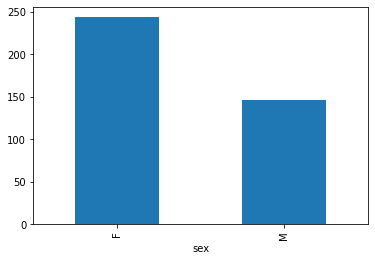

In [9]:
users.groupby("sex").user_id.count().plot.bar()

In [10]:
users.to_csv('data/users.csv',index=False)

In [11]:
rate_history = rate_history.drop(['sex'],axis=1)
rate_history.to_csv('data/rate_history.csv',index=False)

# Test data

In [12]:
rate_history['user_id'].value_counts().describe()

count    390.000000
mean      26.117949
std       20.059332
min        1.000000
25%       10.000000
50%       21.000000
75%       40.750000
max       80.000000
Name: user_id, dtype: float64

Text(0, 0.5, 'Số khách hàng')

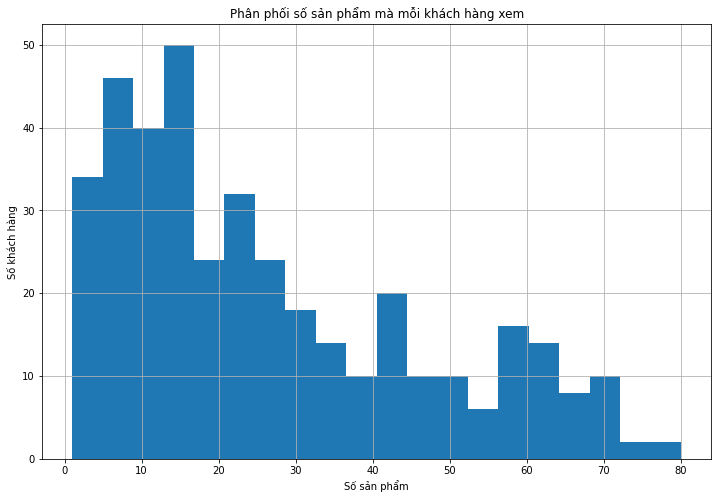

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
rate_history[['user_id', 'product_id']].groupby(['user_id']).count().\
hist(bins = 20, figsize = (12, 8))
plt.title('Phân phối số sản phẩm mà mỗi khách hàng xem')
plt.xlabel('Số sản phẩm')
plt.ylabel('Số khách hàng')

In [14]:
a = rate_history.groupby(['user_id']).count()
a = a[a['product_id']<=5]
a

,product_id
user_id,
22,1
23,1
44,3
45,3
62,1
63,1
68,4
69,4
74,2


In [15]:
len(a)

38